# Exploration des données initiales


## Imports


In [34]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

# Add the parent directory to sys.path so 'api' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from api.database import engine

## Analyse exploratoire des données


In [35]:
from api.database import engine

df = pd.read_sql_table(table_name='clients', con=engine, parse_dates=['date_creation_compte'])
df = df.drop(columns=['id'])
df.head()

,age,taille,poids,sexe,sport_licence,niveau_etude,region,smoker,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret,date_creation_compte
0,19,175.0,62.5,H,False,bac,Île-de-France,True,4958,veuf,NaN,0.19,NaN,NaN,500.000000,2021-04-04
1,31,190.0,63.5,H,True,bac+2,Corse,False,3001,veuf,NaN,0.93,NaN,1270.84,786.595929,2023-03-19
2,68,174.6,66.5,H,True,doctorat,Auvergne-Rhône-Alpes,True,3758,None,NaN,0.68,576.0,NaN,29093.676397,2024-08-27
3,50,187.1,106.8,H,True,master,Occitanie,False,3967,marié,NaN,0.68,NaN,10000.00,7823.303925,2022-03-18
4,42,169.7,63.4,H,True,master,Provence-Alpes-Côte d’Azur,False,2091,None,3.0,0.92,NaN,5000.00,500.000000,2020-10-17


In [36]:
df.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret,date_creation_compte
count,10000.000000,10000.00000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000,10000
mean,46.678800,169.98452,69.864350,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078,2022-09-21 21:53:08.160000
min,18.000000,129.80000,11.700000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000,2020-01-01 00:00:00
25%,32.000000,163.40000,59.700000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000,2021-05-06 00:00:00
50%,47.000000,170.00000,69.800000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057,2022-09-25 00:00:00
75%,61.000000,176.60000,80.000000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527,2024-01-31 00:00:00
max,75.000000,208.40000,132.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000,2025-06-12 00:00:00
std,16.669812,9.88310,14.808592,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   10000 non-null  int64         
 1   taille                10000 non-null  float64       
 2   poids                 10000 non-null  float64       
 3   sexe                  10000 non-null  object        
 4   sport_licence         10000 non-null  bool          
 5   niveau_etude          10000 non-null  object        
 6   region                10000 non-null  object        
 7   smoker                10000 non-null  bool          
 8   revenu_estime_mois    10000 non-null  int64         
 9   situation_familiale   7545 non-null   object        
 10  historique_credits    4692 non-null   float64       
 11  risque_personnel      10000 non-null  float64       
 12  score_credit          4744 non-null   float64       
 13  loyer_mensuel    

<Axes: >

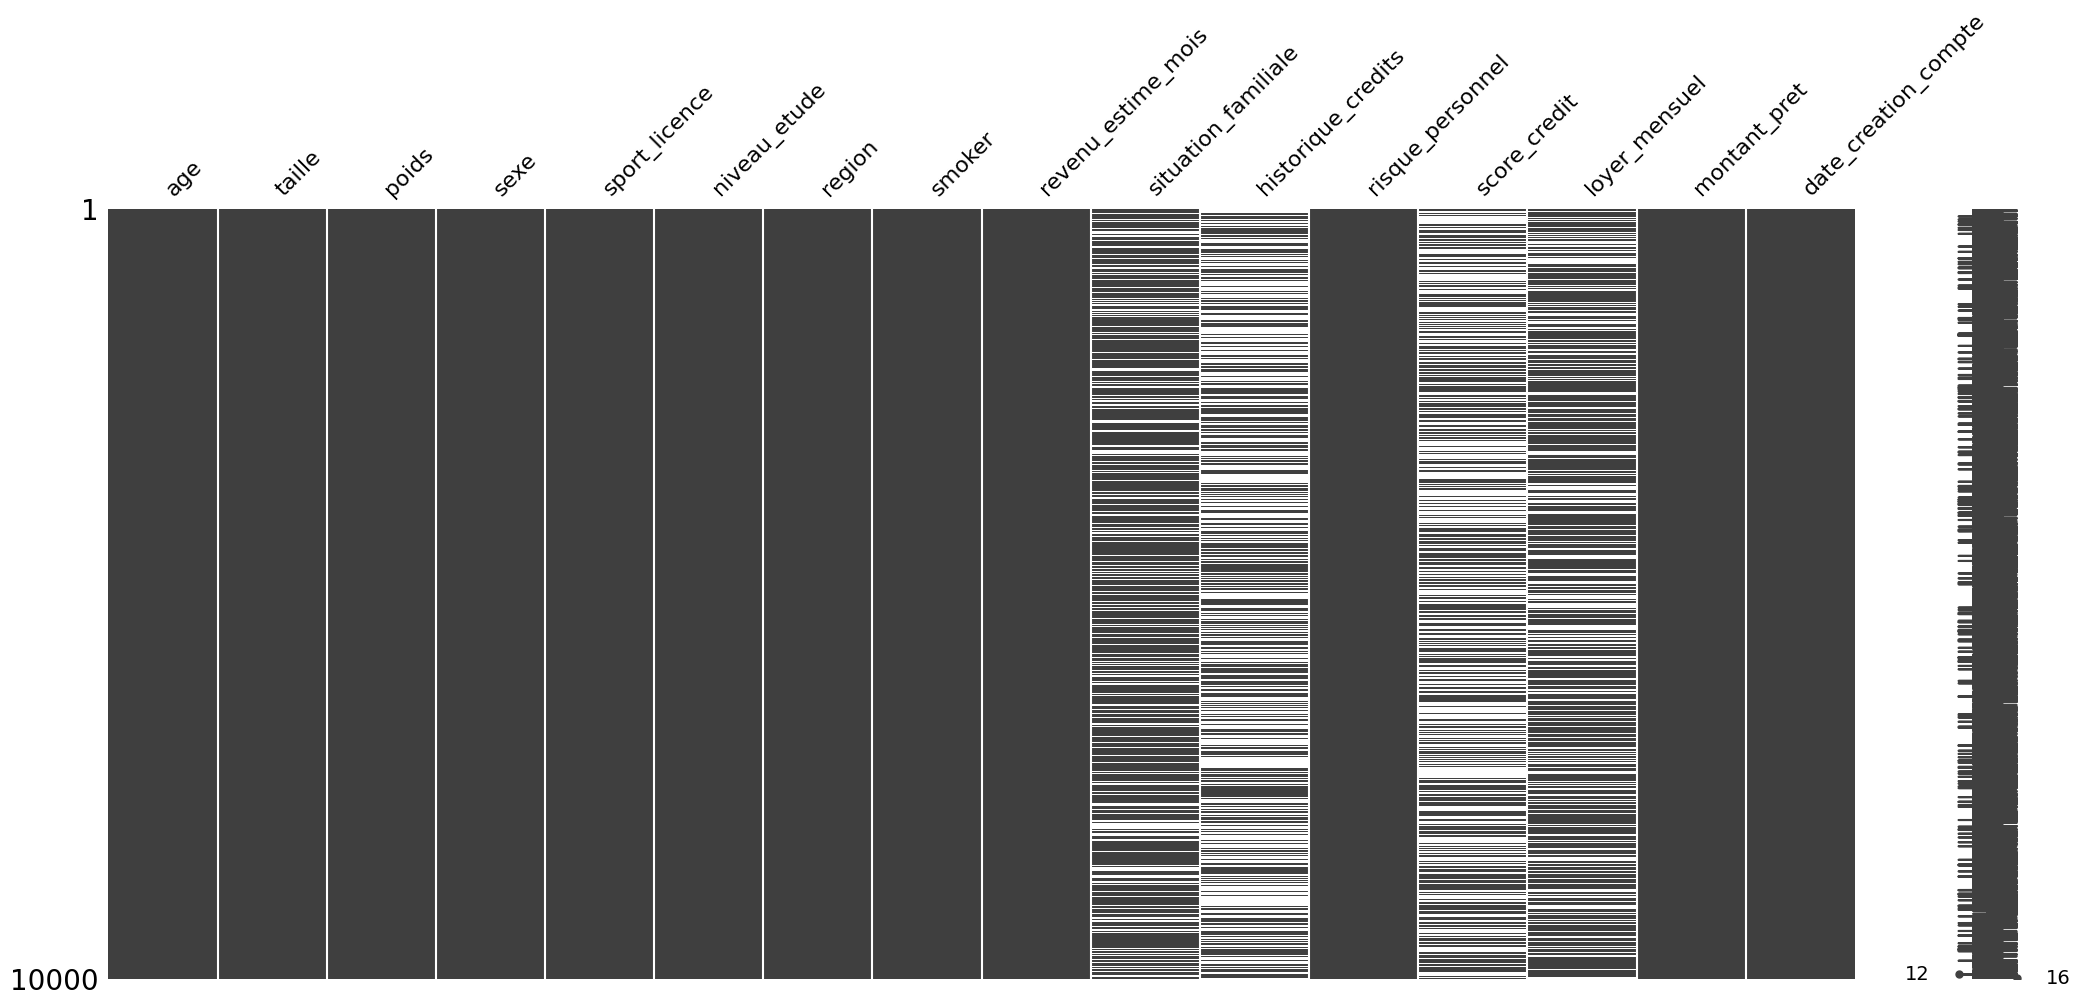

In [38]:
msno.matrix(df)

In [39]:
numerical_cols = ['revenu_estime_mois', 'risque_personnel', 'loyer_mensuel', 'historique_credits', 'score_credit']
categorical_cols = ['age_group', 'sport_licence', 'niveau_etude', 'region', 'smoker', 'situation_familiale']
output_col = ['montant_pret']
df.columns

Index(['age', 'taille', 'poids', 'sexe', 'sport_licence', 'niveau_etude',
       'region', 'smoker', 'revenu_estime_mois', 'situation_familiale',
       'historique_credits', 'risque_personnel', 'score_credit',
       'loyer_mensuel', 'montant_pret', 'date_creation_compte'],
      dtype='object')

In [42]:
for col in numerical_cols:
    negatif_present = (df[col] < 0).any()
    print(f"Présence de valeurs négatives dans la colonne {col}: ", negatif_present)

Présence de valeurs négatives dans la colonne revenu_estime_mois:  False
Présence de valeurs négatives dans la colonne risque_personnel:  False
Présence de valeurs négatives dans la colonne loyer_mensuel:  False
Présence de valeurs négatives dans la colonne historique_credits:  False
Présence de valeurs négatives dans la colonne score_credit:  False


In [41]:
df['loyer_mensuel'] = df['loyer_mensuel'].mask(df['loyer_mensuel'] < 0)

In [ ]:
for col in numerical_cols:
    negatif_present = (df[col] < 0).any()
    print(f"Présence de valeurs négatives dans la colonne {col}: ", negatif_present)